In [57]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AffinityPropagation

In [30]:
df = pd.read_csv('/Users/saurabh/Documents/PythonData/results.csv')

In [25]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [31]:
df = df.drop('ctz', axis=1)

In [32]:
df = df.dropna()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14701 entries, 0 to 16163
Data columns (total 20 columns):
25k          14701 non-null object
age          14701 non-null int64
name         14701 non-null object
division     14701 non-null int64
10k          14701 non-null object
gender       14701 non-null object
half         14701 non-null object
official     14701 non-null float64
bib          14701 non-null object
country      14701 non-null object
overall      14701 non-null int64
pace         14701 non-null float64
state        14701 non-null object
30k          14701 non-null object
5k           14701 non-null object
genderdiv    14701 non-null int64
20k          14701 non-null object
35k          14701 non-null object
city         14701 non-null object
40k          14701 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 2.4+ MB


In [33]:
df = df.drop(['name','bib','state','city'],axis=1)

In [32]:
df.head()

,25k,age,division,10k,gender,half,official,country,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,M,40.93,90.90,CAN,9,3.47,62.07,8.90,9,38.80,74.73,85.55
8,52.62,49,11,19.77,M,43.97,91.78,USA,11,3.50,64.00,9.38,11,41.77,75.95,86.48
17,53.07,46,14,19.75,M,44.20,95.48,CAN,14,3.65,65.68,9.38,14,42.05,79.13,89.88
22,53.08,29,15,19.78,M,44.18,95.98,USA,15,3.67,65.97,9.37,15,42.02,79.82,90.45
23,77.28,32,4,30.92,M,64.92,132.20,USA,4,5.05,93.17,15.57,4,61.52,109.25,125.18


In [ ]:
df.info()

In [34]:
categorial_values = ['25k','10k','30k','5k','20k','35k','40k','half']

for i in categorial_values:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')
    

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14701 entries, 0 to 16163
Data columns (total 16 columns):
25k          14684 non-null float64
age          14701 non-null int64
division     14701 non-null int64
10k          14679 non-null float64
gender       14701 non-null object
half         14687 non-null float64
official     14701 non-null float64
country      14701 non-null object
overall      14701 non-null int64
pace         14701 non-null float64
30k          14687 non-null float64
5k           14645 non-null float64
genderdiv    14701 non-null int64
20k          14686 non-null float64
35k          14683 non-null float64
40k          14688 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 1.9+ MB


In [35]:
numeric_data = df[['25k','10k','30k','5k','20k','35k','40k','half','age','division']]

In [25]:
numeric_data

,25k,10k,30k,5k,20k,35k,40k,half,age,division
0,49.87,18.18,62.07,8.90,38.80,74.73,85.55,40.93,28,9
8,52.62,19.77,64.00,9.38,41.77,75.95,86.48,43.97,49,11
17,53.07,19.75,65.68,9.38,42.05,79.13,89.88,44.20,46,14
22,53.08,19.78,65.97,9.37,42.02,79.82,90.45,44.18,29,15
23,77.28,30.92,93.17,15.57,61.52,109.25,125.18,64.92,32,4
24,58.33,20.90,72.20,9.93,45.45,85.98,97.90,48.08,48,22
25,77.60,30.93,94.08,15.58,61.72,111.45,129.62,65.13,30,15
26,56.05,21.38,68.22,10.42,44.38,80.95,92.17,46.72,29,18
27,55.60,20.15,68.18,9.37,43.88,82.00,93.40,46.18,26,19
28,77.15,30.92,93.33,15.57,61.52,110.28,127.60,64.92,29,11


In [36]:
dummy = pd.get_dummies(df[['gender','country']])

In [37]:
df = df.drop(['gender','country'],axis=1)
df = pd.concat([numeric_data,dummy], axis=1)
df.head()

,25k,10k,30k,5k,20k,35k,40k,half,age,division,gender_F,gender_M,country_CAN,country_MEX,country_USA
0,49.87,18.18,62.07,8.90,38.80,74.73,85.55,40.93,28,9,0,1,1,0,0
8,52.62,19.77,64.00,9.38,41.77,75.95,86.48,43.97,49,11,0,1,0,0,1
17,53.07,19.75,65.68,9.38,42.05,79.13,89.88,44.20,46,14,0,1,1,0,0
22,53.08,19.78,65.97,9.37,42.02,79.82,90.45,44.18,29,15,0,1,0,0,1
23,77.28,30.92,93.17,15.57,61.52,109.25,125.18,64.92,32,4,0,1,0,0,1


In [39]:
np.any(np.isnan(df))

True

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14701 entries, 0 to 16163
Data columns (total 15 columns):
25k            14684 non-null float64
10k            14679 non-null float64
30k            14687 non-null float64
5k             14645 non-null float64
20k            14686 non-null float64
35k            14683 non-null float64
40k            14688 non-null float64
half           14687 non-null float64
age            14701 non-null int64
division       14701 non-null int64
gender_F       14701 non-null uint8
gender_M       14701 non-null uint8
country_CAN    14701 non-null uint8
country_MEX    14701 non-null uint8
country_USA    14701 non-null uint8
dtypes: float64(8), int64(2), uint8(5)
memory usage: 1.3 MB


In [42]:
df = df.dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14609 entries, 0 to 16163
Data columns (total 15 columns):
25k            14609 non-null float64
10k            14609 non-null float64
30k            14609 non-null float64
5k             14609 non-null float64
20k            14609 non-null float64
35k            14609 non-null float64
40k            14609 non-null float64
half           14609 non-null float64
age            14609 non-null int64
division       14609 non-null int64
gender_F       14609 non-null uint8
gender_M       14609 non-null uint8
country_CAN    14609 non-null uint8
country_MEX    14609 non-null uint8
country_USA    14609 non-null uint8
dtypes: float64(8), int64(2), uint8(5)
memory usage: 1.3 MB


In [44]:
model = KMeans(n_clusters=2, random_state=42).fit(df)
labels = model.labels_
print(metrics.silhouette_score(df, labels, metric='euclidean'))

0.6615235284648913


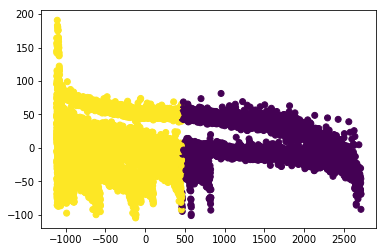

In [47]:
X_pca = PCA(2).fit_transform(df)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(df)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()


In [48]:
df['cluster_labels'] = y_pred
df.groupby('cluster_labels').mean()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,25k,10k,30k,5k,20k,35k,40k,half,age,division,gender_F,gender_M,country_CAN,country_MEX,country_USA
cluster_labels,,,,,,,,,,,,,,,
0,120.751548,47.536189,147.205067,23.807729,95.837474,175.078576,203.523866,101.141565,33.331703,2503.911709,0.512904,0.487096,0.075795,0.000272,0.923934
1,117.901453,46.710889,142.986268,23.421871,93.913580,168.956664,194.963201,99.071404,44.120242,646.500366,0.388177,0.611823,0.114019,0.000000,0.885981


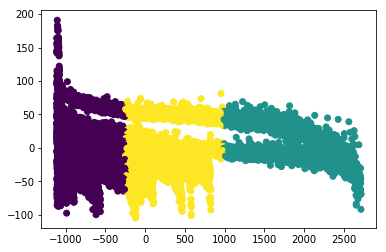

In [49]:
X_pca = PCA(2).fit_transform(df)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(df)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [50]:
df['cluster_labels'] = y_pred
df.groupby('cluster_labels').mean()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,25k,10k,30k,5k,20k,35k,40k,half,age,division,gender_F,gender_M,country_CAN,country_MEX,country_USA
cluster_labels,,,,,,,,,,,,,,,
0,116.784900,46.351092,141.447037,23.255279,93.105655,166.837320,192.123817,98.205615,45.531132,393.124797,0.417298,0.582702,0.117217,0.00000,0.882783
1,122.153329,48.008035,149.062962,24.040347,96.882406,177.475445,206.574926,102.255290,32.385621,2853.052288,0.572304,0.427696,0.072712,0.00000,0.927288
2,119.647044,47.239003,145.505751,23.660107,95.125211,172.589283,200.004825,100.375104,39.634611,1339.446260,0.344856,0.655144,0.100775,0.00021,0.899015


In [51]:
model = KMeans(n_clusters=3, random_state=42).fit(df)
labels = model.labels_
print(metrics.silhouette_score(df, labels, metric='euclidean'))

0.5900943735982881


The algorithm is performing better with 2 clusters and as per the details of those clusters different features are averaged to a value close to one another so clusters are closer to each other 
Lets see cluster 1 giving average mean age around 33 while cluster 2 is giving averaged age of 44 so both ages are almost close to each other

Also cluster 1 shows more female participants were there in the marathon compare to male while cluster 2 shows more male participants compared to female participants